## 참고: https://hleecaster.com/ml-linear-regression-example/

## 라이브러리 설치, 호출

!pip3 install -U scikit-learn<br>
!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 데이터 다운로드 (특별할인 판매)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/logistic-regression/special-sales.csv')
print(df.head())

         date weekday  busy_day  high_temperature  special_sales
0  2002-08-05     Mon         0                28              1
1  2002-08-06     Tue         0                24              0
2  2002-08-07     Wed         1                26              0
3  2002-08-08     Thu         0                24              0
4  2002-08-09     Fri         0                23              0


## Input, Feature 설정

In [3]:
Label = df['special_sales']
InputFeature = df[['busy_day','high_temperature']]

## matplot library를 활용한 point plot

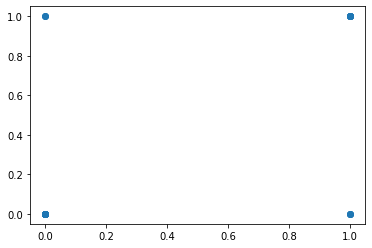

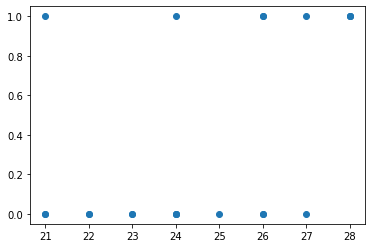

In [4]:
plt.plot(InputFeature['busy_day'], Label, 'o') # Label이 categorical이므로 시각화가 잘 안됨.
plt.show()

plt.plot(InputFeature['high_temperature'], Label, 'o')
plt.show()

## Logistic regression 모델 fitting

In [5]:
InputFeature = sm.add_constant(InputFeature)
model = sm.Logit(Label, InputFeature)

# Linear Regression
model = model.fit()
print(model.params)

Optimization terminated successfully.
         Current function value: 0.423859
         Iterations 7
const              -15.203506
busy_day             2.442647
high_temperature     0.544505
dtype: float64


## 통계모델 분석하기

In [6]:
print( model.summary() )

                           Logit Regression Results                           
Dep. Variable:          special_sales   No. Observations:                   21
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                  0.3622
Time:                        15:21:51   Log-Likelihood:                -8.9010
converged:                       True   LL-Null:                       -13.955
Covariance Type:            nonrobust   LLR p-value:                  0.006383
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -15.2035      7.657     -1.986      0.047     -30.210      -0.197
busy_day             2.4426      1.240      1.969      0.049       0.011       4.874
high_temperature     0.5445 

<h2>Logistic regression 모델 해석하기</h2>
Coefficient: ln ( odds ) = 2.4426 * busy_day + 0.5545 * high_temperature + const<br>
<br>
odds를 알기 위해서는 exponential을 해주어야한다. (log 없애기)<br>

In [7]:
np.exp(model.params).round(4)
# busy_day 일때 아닌 날보다 11배 만큼 special sale을 할 확률이 높아진다

const                0.0000
busy_day            11.5035
high_temperature     1.7238
dtype: float64

<h3>p.value</h3>
busy_day는 0.05보다 작음, 즉 coef가 0보다 크다는 뜻. 유의한 변수<br>
High temperature는 p-value가 0.067로 근소하게 유의하지 않음.<br>
하지만 0.1보다 작기에 이를 border라고도 표현함<br>
비록 유의하지는 않지만, 어느정도 영향이 있을 것으로 짐작 가능<br>

In [8]:
df[['busy_day','high_temperature']]



,busy_day,high_temperature
0,0,28
1,0,24
2,1,26
3,0,24
4,0,23
5,1,28
6,1,24
7,0,26
8,0,25
9,1,28


## 결과 출력 (0 ~ 1 값, 즉 sigmoid 값)

In [9]:
model.predict(InputFeature).head()

0    0.510660
1    0.105706
2    0.801593
3    0.105706
4    0.064171
dtype: float64

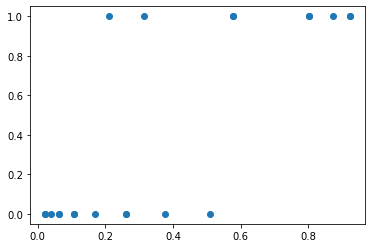

In [10]:
plt.plot(model.predict(InputFeature), df['busy_day'], 'o')
plt.show()

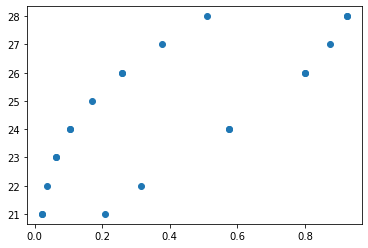

In [11]:
plt.plot(model.predict(InputFeature), df['high_temperature'], 'o')
plt.show()